# Исследовательский анализ рынка общественного питания Москвы 

## Цель и задачи

**Цель**: Провести исследовательский анализ данных рынка общественного питания Москвы для фонда Shut Up and Take My Money \
**Задачи**:
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.

## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## Загрузка данных и знакомство с ними

In [2]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from phik import phik_matrix

Знакомство и общая информация с данными датасета `rest_info`

In [4]:
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info` содержит 9 столбцов и 8406 строк \ 
После первичного ознакомления с датасетом можно сделать следующие выводы:
* Названия всех стобцов находят в удобном виде для анализа
* Все числовые данные находятся в числовых форматах int64 и float64, однако столбец `chain` содержит бинарные данные, а значит его размерность стоит оптимизировать. Так же стоит изменить тип столбца `seats`, в нем представлены дискретные данные, а тип вещественный, однако это связано с пропусками в столбце, а значит перед изменением типа нужно поработать с ними
* Пропуски явно содержатся в столбцах `hours` и `seats`. Однако далее проверим и другие столбцы на их наличие, возможно они уже заменены на индикаторы
* При поверхностном рассмотрении данные соответствуют своему описанию

Знакомство и общая информация с данными датасета `rest_price`

In [6]:
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price` содержит 5 столбцов и 4058 строк  \ 
После первичного ознакомления с датасетом можно сделать следующие выводы:
* Названия всех стобцов находят в удобном виде для анализа
* Все числовые данные находятся в числовом формате float64
* Пропуски содержатся во всех столбцах кроме `id`, однако в столбцах `middle_avg_bill` и `middle_coffee_cup` это связано с особенностью датасета, соотвествует их описанию и не является ошибкой, такие пропуски относятся к MAR
* При поверхностном рассмотрении данные соответствуют своему описанию

**На что стоит обратить внимание:**
* Количество строк в двух датасетах и не сходится, возможно это из-за того, что информация о ценах имеется не для всех заведений
* В датасете `rest_price` имеется отдельний столбец со средней оценкой чашки капучино, но нет для других напитков, информация о которых представлена в датасете

In [8]:
# Объеденим датасеты, используем "leftjoin", иначе потеряем 4349 строк,
#это более половины 1 датасета
df = pd.merge(info_df, price_df, on='id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


## Предобработка данных
### Преобразование типов
Как написано выше размерность столбца `chain` можно оптимизировать. Стоит также изменить тип столбца `seats` на int, однако в этом столбце есть пропуски, а значит перед изменением типа нужно поработать с ними

In [9]:
# Оптимизация размерности столбца chain 
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
# Проверка размерности
df['chain'].dtype

dtype('int8')

### Работа с пропусками
Подчитаем количество пропусков в каждом столбце

In [10]:
round(df.isna().mean(), 2)

id                   0.00
name                 0.00
category             0.00
address              0.00
district             0.00
hours                0.06
rating               0.00
chain                0.00
seats                0.43
price                0.61
avg_bill             0.55
middle_avg_bill      0.63
middle_coffee_cup    0.94
dtype: float64

Процент пропусков в столбцах, в которых вообще есть пропуски, больше 5%, в таком случае в небольшом датасете удалять пропуски нельзя. 
* В столбце `hours` пропуски могли появиться из-за того, что владельцы бизнесов не заполнили график работы в яндекс картах, оставим как есть
* В столбце `seats` пропуски возможно появились по той же причине, также оставим как есть
* В столбце `price` значения формируются на основе меню, предоставляемого владельцем, и упоминанием цен в комментариях пользователей, таким образом пропуски могли появиться из-за отсудствия меню и упоминания цен в комментариях. В данном случае оставим пропуски как есть.
* В столбце `avg_bill` значения формируются на основе меню, соответственно если собственник не загрузил меню, появится пропуск. В данном случае оставим пропуски так как есть.
* В столбце `middle_avg_bill` отсудствуют значения из-за особенностей столбца, соответсвенно это MAR и здесь мы оставляем все как есть.
* В столбце `middle_coffee_cup` ситуация та же.

### Работа с дубликатами

Проверим столбцы датафрейма на наличие явных и неявных дубликатов

In [11]:
df['id'].nunique()

8406

Количество уникальных id совпадает с количеством строк в датафрейме, вероятно мы не сможем встретиться с явными дубликатами. Проверим на наличие дубликатов столбцы `name` и `address`, но перед этим нормализуем их

In [12]:
for col in ['name', 'address']:
    df[col] = df[col].str.lower()
    df[col] = df[col].str.strip()
    df[col] = df[col].map(lambda x: re.sub(r'[^\w\s]', '', x))
    print(f'Количество дубликатов в столбце {col}: {df[col].duplicated().sum()}')

Количество дубликатов в столбце name: 2908
Количество дубликатов в столбце address: 2655


В обоих столбцах обнаружились дубликаты. Однако дубликаты могут возникать в `name` из-за того, что это сеть, в `address` из-за того, что это фудкорт. Проверим есть ли совпадения по двум этим столб

In [13]:
dupl = df[['name', 'address']].value_counts().reset_index(name='count')
dupl[dupl['count'] > 1]

,name,address,count
0,хлеб да выпечка,москва ярцевская улица 19,2
1,в парке вкуснее,москва северный административный округ район л...,2
2,кафе,москва парк ангарские пруды,2
3,раковарня клешни и хвосты,москва проспект мира 118,2
4,more poke,москва волоколамское шоссе 11 стр 2,2


Нашлось 5 дубликатов, удалим их

In [14]:
df.drop_duplicates(subset=['name', 'address'], keep='first', inplace=True)

Проверим значения в категориальных столбце `hours`

In [15]:
df['hours'] = df['hours'].str.lower()
df['hours'] = df['hours'].str.strip()
display(df['hours'].duplicated().sum())
pd.DataFrame(df['hours'].unique())

7094

,0
0,"ежедневно, 10:00–22:00"
1,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00..."
2,"ежедневно, 09:00–22:00"
3,"ежедневно, 10:00–23:00"
4,пн 15:00–04:00; вт-вс 15:00–05:00
...,...
1302,пн 00:00–21:00; вт-сб 09:00–21:00; вс 00:00–21:00
1303,"пн-пт 07:00–20:00; сб,вс 09:00–19:00"
1304,"пн-пт 08:30–21:30; сб,вс 09:00–21:30"
1305,"пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00..."


Дубликаты в столбце имеются, но очевидно что это не ошибка, а особенность данных

Проверим значения в категориальных столбцах

In [16]:
for col in ['category', 'district']:
    print(df[col].unique())

['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']
['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


В этих столбцах нет дубликатов

### Создание новых столбцов
Создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
* логическое значение True — если заведение работает ежедневно и круглосуточно;
* логическое значение False — в противоположном случае.

In [17]:
df['hours'].head(15)

0                                ежедневно, 10:00–22:00
1                                ежедневно, 10:00–22:00
2     пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...
3                                ежедневно, 09:00–22:00
4                                ежедневно, 10:00–22:00
5                                ежедневно, 10:00–23:00
6                     пн 15:00–04:00; вт-вс 15:00–05:00
7     пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...
8                                ежедневно, 10:00–22:00
9                                ежедневно, 12:00–00:00
10                             ежедневно, круглосуточно
11                               ежедневно, 10:00–21:00
12                                    вт-сб 09:00–18:00
13                               ежедневно, 08:00–22:00
14                               ежедневно, 13:00–00:00
Name: hours, dtype: object

In [18]:
#    Функция создаёт новый столбец с бинарным признаком, который указывает
#   работает ли заведение ежедневно и круглосуточно.
def create_is_24_7(data):
    if data == 'ежедневно, круглосуточно':
        return True
    else:
        return False


In [19]:
# Создаём столбец is_24_7 с помощью функции create_is_24_7
df['is_24_7'] = df['hours'].apply(create_is_24_7)
df['is_24_7'].sum()

730

Таким образом заведений, которые работают ежедневно и круглосуточно 730

### Промежуточный вывод
На этом предобработка завершена. В результате предобработки данных были выполнены следующие действия:
* Столбец `seats` приведен к правильному типу int, размерность столбца `chain` соптимизирована
* Были обнаружены пропуски в следующих столбцах: `hours` (6.4%), `seats` (43%), `price` (60.6%), `avg_bill` (54.6%), `middle_avg_bill` (62.5%), `middle_coffee_cup` (93.6%). В столбце `hours` пропуски были заменены на индикаторное значение "Не указано", в столбце `seats` - на среднее значение по категории заведения. В остальных столбцах изменения не были проведены.
* Во всем датасете обнаружилось 4 дубликата по полям название и адрес, они были успешно удалены.
* Был создан новый столбец `is_24_7`, который показывает работает ли заведение 24/7.

## Исследовательский анализ данных
### Категории заведений

In [20]:
# Подсчитаем количество заведений для каждой категории
df['category'].value_counts()

category
кафе               2376
ресторан           2042
кофейня            1412
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

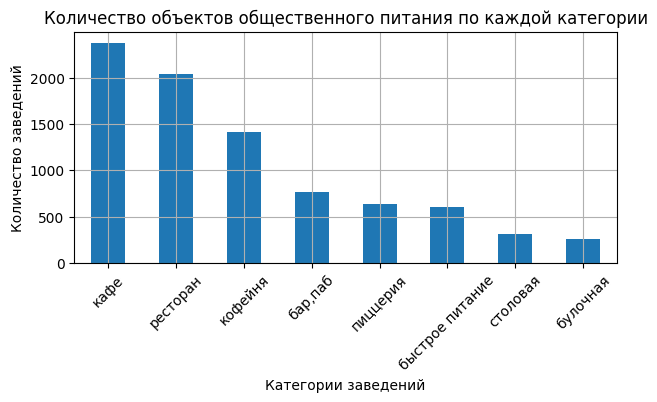

In [21]:
# В качестве визуализации создадим столбчатую диаграмму
df['category'].value_counts().plot(
                        kind='bar',
                        figsize=(7,3),
                        rot=45)
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')
plt.title('Количество объектов общественного питания по каждой категории')
plt.grid()
plt.show()

Как видно на рынке общественного питания преобладают кафе и рестораны

### Исследование по административным районам

In [22]:
# Посмотрим какие районы присудствуют в данных
pd.Series(df['district'].unique())

0            Северный административный округ
1    Северо-Восточный административный округ
2     Северо-Западный административный округ
3            Западный административный округ
4         Центральный административный округ
5           Восточный административный округ
6       Юго-Восточный административный округ
7               Южный административный округ
8        Юго-Западный административный округ
dtype: object

 В данных присудствуют данные о 9 из 12 административных округов Москвы. Посмотрим распределение заведений по эти районам

In [23]:
df['district'].value_counts()

district
Центральный административный округ         2242
Северный административный округ             897
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64

In [24]:
# Переименуем названия округов для удобства визуализации
df['district'] = df['district'].replace(
    {
        'Центральный административный округ': 'Центр. админ. округ',
        'Северный административный округ': 'Север. админ. округ',
        'Южный административный округ': 'Юж. админ. округ',
        'Северо-Восточный административный округ': 'Север-Вост. админ. округ',
        'Западный административный округ': 'Запад. админ. округ',
        'Восточный административный округ': 'Вост. админ. округ',
        'Юго-Восточный административный округ': 'Юг-Вост. админ. округ',
        'Юго-Западный административный округ': 'Юг-Запад. админ. округ',
        'Северо-Западный административный округ': 'Север-Запад. админ. округ'
    }
)

Уже видно, что наибольшее количество заведений находятся в центральном административном округе. В северо-западном админимстративном округе же находится наименьшее количество заведений. В других округах заведения распределены примерно равномерно. \
Визуализируем распределение столбца `district` с помощью столбчатой диаграммы:

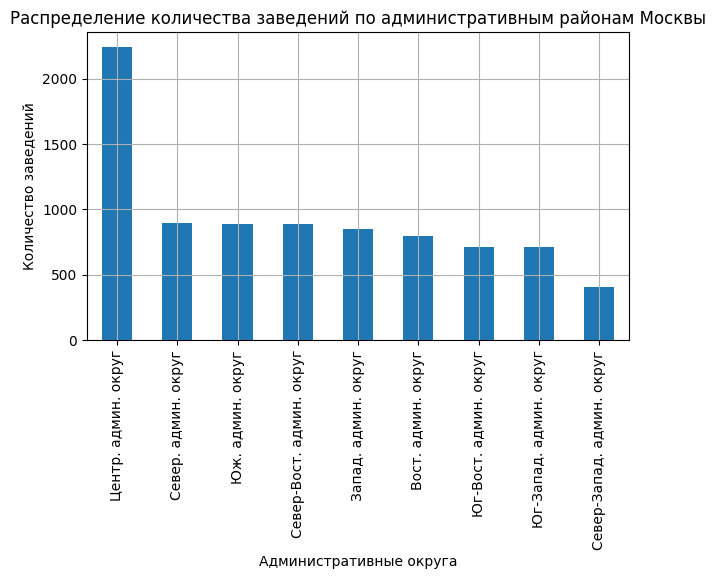

In [25]:
df['district'].value_counts().plot(
                        kind='bar',
                        figsize=(7,4),
                        rot=90)
plt.xlabel('Административные округа')
plt.ylabel('Количество заведений')
plt.title('Распределение количества заведений по административным районам Москвы')
plt.grid()
plt.show()

Все выводы описанные выше подтвержаются диаграммой

In [26]:
# Создадим отдельный датафрейм для исследования по категориям заведений Центрального административного округа
centre = df[df['district'] == 'Центр. админ. округ']
# Подчитаем количество заведений для каждой категории
centre['category'].value_counts()

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

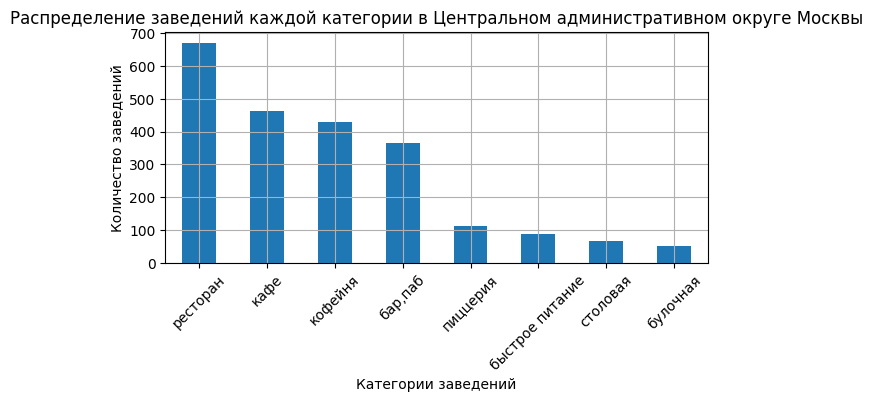

In [27]:
# Добавим визуализацию
centre['category'].value_counts().plot(
                        kind='bar',
                        figsize=(7,3),
                        rot=45)
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')
plt.title('Распределение заведений каждой категории в Центральном административном округе Москвы')
plt.grid()
plt.show()

На визуализации видим, что заметно больше всего в Центральном округе ресторанов, меньше всего булочных. Если сравнить эту визуализацию с распределением категорий заведений для всей Москвы можно заметить, что Центральном округе столицы по популярности лидируют рестораны, а не кафе

### Изучение соотношения сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения

In [28]:
# Подсчитаем каких заведений больше сетевых или несетевых
df['chain'].value_counts()

chain
0    5199
1    3202
Name: count, dtype: int64

Судя по результату несетевых заведений больше. Визуализируем это распределение с помощью столбчатой диаграммы

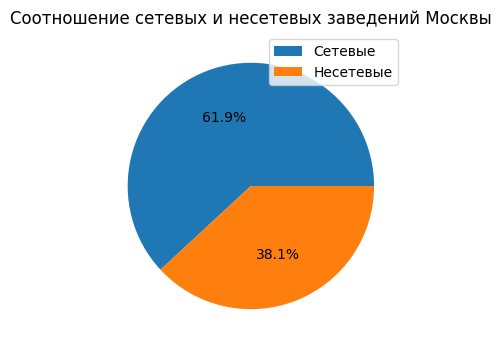

In [29]:
plt.figure(figsize=(7,4))
df['chain'].value_counts().plot(
                        kind='pie',
                        autopct='%1.1f%%',
                        labels=None)
plt.ylabel('')
plt.title('Соотношение сетевых и несетевых заведений Москвы')
plt.legend(('Сетевые', 'Несетевые'), loc='upper right')
plt.show()

Визуализация подтверждает вывод, сделанный выше

Далее подсчитаем долю сетевых заведений в разрезе категорий заведения.

In [30]:
# Сначала сгруппируем и посчитаем по каждой категории количество сетевых и несетевых заведений
grouped = df.groupby('category')['chain'].value_counts(normalize=True).unstack()
grouped = grouped[1].sort_values(ascending=False)
grouped

category
булочная           0.613281
пиццерия           0.521327
кофейня            0.509207
быстрое питание    0.384743
ресторан           0.357003
кафе               0.327862
столовая           0.279365
бар,паб            0.219895
Name: 1, dtype: float64

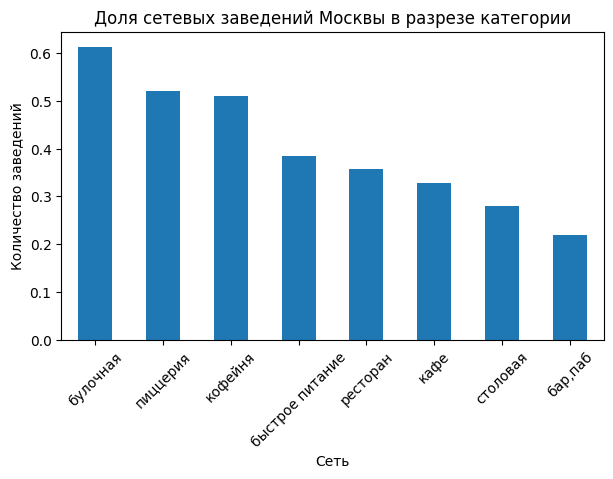

In [31]:
# Далее построим визуализацию, это будет столбчатая диаграмма
grouped.plot(
            kind='bar',
            figsize=(7,4),
            rot=45)
plt.xlabel('Сеть')
plt.ylabel('Количество заведений')
plt.title('Доля сетевых заведений Москвы в разрезе категории')
plt.show()

На визуализации видно, что чаще всего сетевыми бывают булочные, пиццерии и кофейни

### Исследование количества посадочных мест

Исследуем столбец `seats` на наличие аномальных значений и выбросов

In [32]:
df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

По данным выше можно предположить, что данные распределены неравномерно, об этом говорит достаточно маленькое значение 3 квартиля. Разница между 3 квартилем и максимальным значением очень большая, что может свидетельствовать о выбросах. Для подтверждения построим диаграмму "ящик с усами"

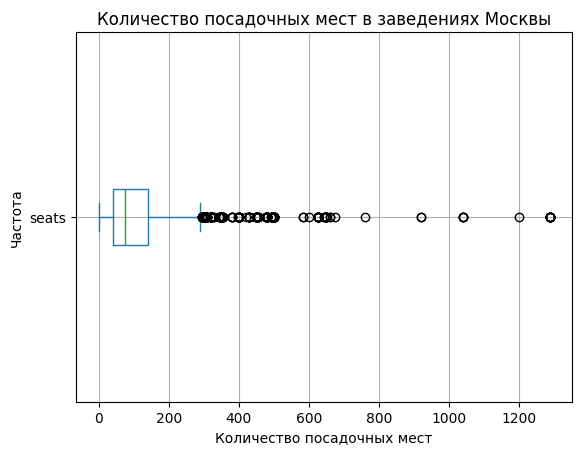

In [33]:
df['seats'].plot(
    kind='box', vert=False
)
plt.title('Количество посадочных мест в заведениях Москвы')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.grid()
plt.show()

Как видно из диаграммы распределение посадочных мест смещено влево. Также подтвердилось предположение о выбросах. Возможно это не аномалии, а особенность данных, вполне возможно за большим количеством посадочных мест скрываются крупные рестораны или банкетные залы.

Найдем типичное количество посадочных мест для каждой категории заведений

In [34]:
grouped = df.groupby('category')['seats'].agg(lambda x: x.mode()[0])
print('Типичные количество посадочных мест по категориям')
grouped = grouped.sort_values(ascending=False)
grouped

Типичные количество посадочных мест по категориям


category
кофейня            100.0
ресторан           100.0
бар,паб             60.0
кафе                40.0
пиццерия            40.0
столовая            40.0
булочная             0.0
быстрое питание      0.0
Name: seats, dtype: float64

И визуализируем полученные данные в виде столбчатой диаграммы

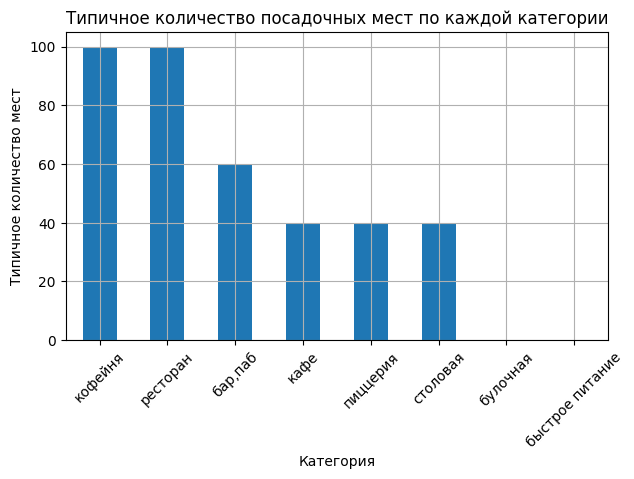

In [35]:
grouped.plot(
            kind='bar',
            figsize=(7,4),
            rot=45)
plt.xlabel('Категория')
plt.ylabel('Типичное количество мест')
plt.title('Типичное количество посадочных мест по каждой категории')
plt.grid()
plt.show()

### Исследование рейтинга заведений
Для этого визуализируем распределение средних рейтингов по категориям заведений. Для этого возьмем опять же столбчатую диаграмму

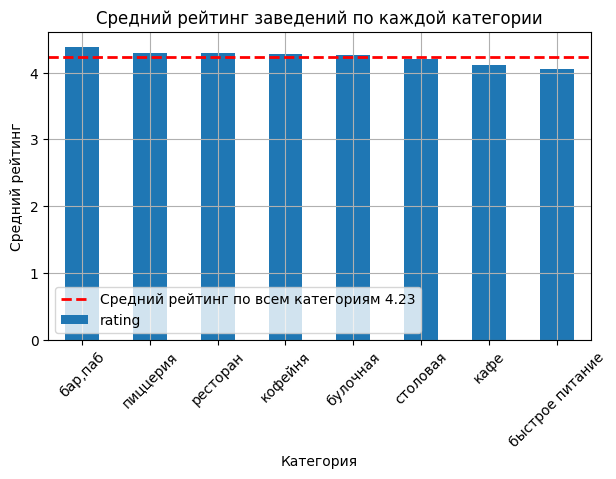

In [36]:
grouped = round(df.groupby('category')['rating'].mean(), 2).sort_values(ascending=False)
grouped.plot(
    kind='bar',
    figsize=(7,4),
    rot=45,
    legend=True
)
plt.axhline(df['rating'].mean(), 
            color='red',
            linestyle='--', 
            linewidth=2,
            label='Средний рейтинг по всем категориям ' + str(round(df['rating'].mean(),2)))
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг заведений по каждой категории')
plt.legend()
plt.grid()
plt.show()

Усредненные рейтинги разных категорий заведений слабо различаются. Их значения колеблются около 4.2 

### Изучение корреляции данных с рейтингом

In [37]:
corr_cols = ['rating',
             'category',
             'district',
             'chain',
             'seats',
             'price',
             'is_24_7']
corr_matrix = df[corr_cols].phik_matrix(interval_cols='rating')
corr_matrix

,rating,category,district,chain,seats,price,is_24_7
rating,1.000000,0.271431,0.316199,0.139205,0.000000,0.344793,0.157705
category,0.271431,1.000000,0.174487,0.265786,0.290268,0.566933,0.244785
district,0.316199,0.174487,1.000000,0.064461,0.732054,0.202787,0.076344
chain,0.139205,0.265786,0.064461,1.000000,0.139705,0.218211,0.043571
seats,0.000000,0.290268,0.732054,0.139705,1.000000,0.346789,0.095044
price,0.344793,0.566933,0.202787,0.218211,0.346789,1.000000,0.084183
is_24_7,0.157705,0.244785,0.076344,0.043571,0.095044,0.084183,1.000000


<Axes: >

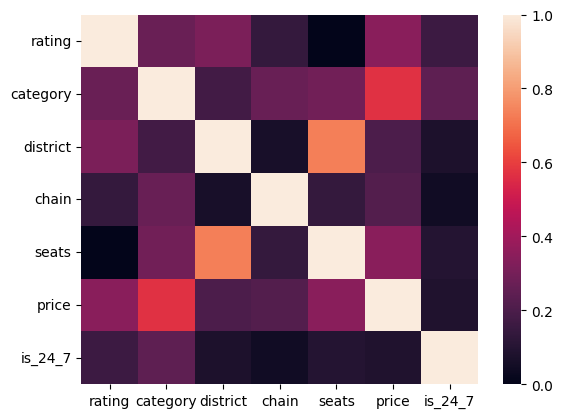

In [38]:
# Визуализируем матрицу корреляции с помощью тепловой карты
sns.heatmap(corr_matrix)

Самую сильную корреляцию с рейтингом заведений показывают столбцы с местоположением (`district`) и ценой (`price`), коэффициенты корреляции для этих столбцов составляют 0.32и 0.35, эти значения находятся в диапозоне от 0.3 до 0.7, что указывает на возможную умеренную связь. Определим характер этой связи с столбцом `price`

In [39]:
# Переведем ценовую категорию в ранги
df['price_rank'] = df['price'].map({'низкие': 1, 
                                    'средние': 2,
                                    'выше среднего': 3,
                                    'высокие': 4}).fillna(-1).astype('int64')

In [40]:
df[['price_rank', 'rating']].corr(method='spearman')

,price_rank,rating
price_rank,1.000000,0.199754
rating,0.199754,1.000000


Судя по коэффициенту Спирмена между категорией цены и рейтингом имеется слабая положительная зависимость

### Топ-15 популярных сетей Москвы

In [41]:
# Группировка сетевых заведений по названию и категории и подсчет частоты встечаемости
print('Топ-15 популярных сетей Москвы')
grouped = df[df['chain'] == 1][['name', 'category']].value_counts().reset_index()
top_15 = grouped.sort_values(by='count', ascending=False).head(15)
top_15

Топ-15 популярных сетей Москвы


,name,category,count
0,шоколадница,кофейня,119
1,доминос пицца,пиццерия,76
2,додо пицца,пиццерия,74
3,one price coffee,кофейня,71
4,яндекс лавка,ресторан,69
5,cofix,кофейня,65
6,prime,ресторан,49
7,кофепорт,кофейня,42
8,кулинарная лавка братьев караваевых,кафе,39
9,теремок,ресторан,36


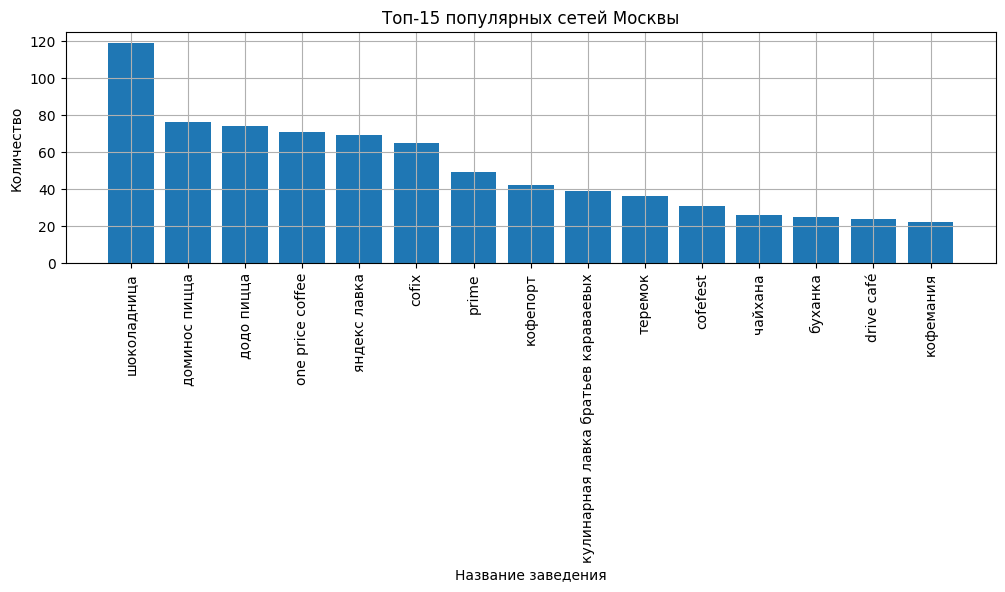

In [42]:
# Визуализируем топ-15 сетевых заведений Москвы
plt.figure(figsize=(12, 3))
plt.bar(
    top_15['name'],
    top_15['count']
)
plt.ylabel('Количество')
plt.xlabel('Название заведения')
plt.title('Топ-15 популярных сетей Москвы')
plt.xticks(rotation=90) 
plt.grid()
plt.show()

На графике выше представлены названия 15 самых популярных сетевых заведений Москвы. Самое популярное заведение - Шоколадница, 15 Место занимает Кофемания. Среди них больше всего кофеен, но также есть 3 ресторана, 3 кафе, 2 пиццерии и булочная

In [43]:
# Подсчитаем средний рейтинг для заведений, выделенных выше
mean_rate = round(df[df['chain'] == 1].groupby('name', as_index=False)['rating'].mean(), 2)
top_15 = top_15.merge(mean_rate, on='name', how='left')
top_15 = top_15.sort_values('rating', ascending=False)

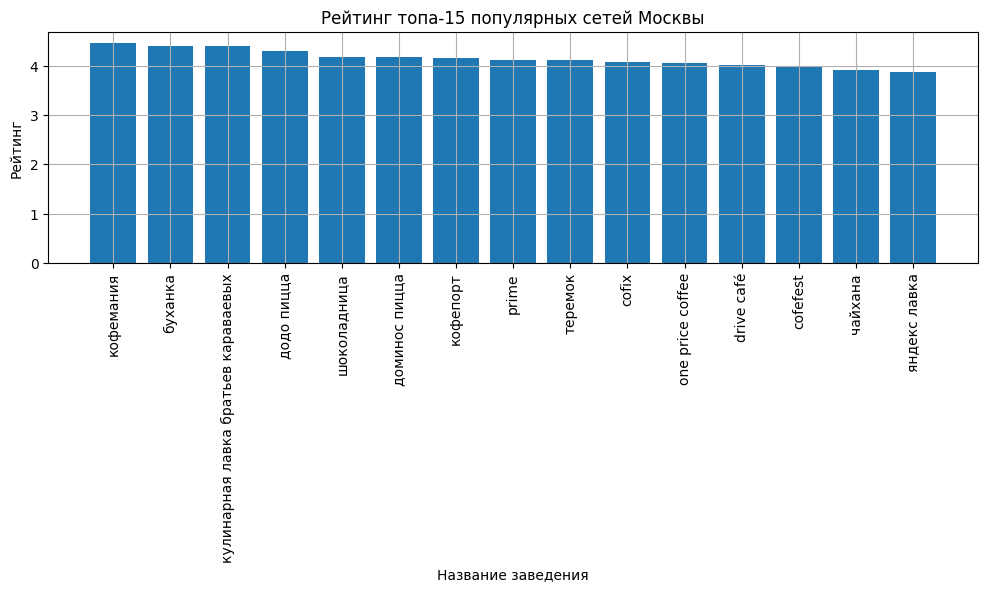

In [44]:
# Визуализируем рейтинг топа-15 сетевых заведений Москвы
plt.figure(figsize=(12, 3))
plt.bar(
    top_15['name'],
    top_15['rating']
)
plt.ylabel('Рейтинг')
plt.xlabel('Название заведения')
plt.title('Рейтинг топа-15 популярных сетей Москвы')
plt.xticks(rotation=90) 
plt.grid()
plt.show()

По графику рейтинга для топ-15 сетевых заведений Москвы видно, что средний рейтинг находится в диапозоне 3.8 до 4.6, можно сказать, что популярные сети имеют высокий рейтинг

### Изучение вариации среднего чека

In [45]:
# Сгруппируем датасет по району Москвы и подсчитаем средний чек в заведениях этого района
grouped = round(df.groupby('district')['middle_avg_bill'].mean(), 2).sort_values(ascending=False)
grouped

district
Центр. админ. округ          1191.06
Запад. админ. округ          1053.23
Север. админ. округ           927.96
Юж. админ. округ              834.40
Север-Запад. админ. округ     822.22
Вост. админ. округ            820.63
Юг-Запад. админ. округ        792.56
Север-Вост. админ. округ      716.61
Юг-Вост. админ. округ         654.10
Name: middle_avg_bill, dtype: float64

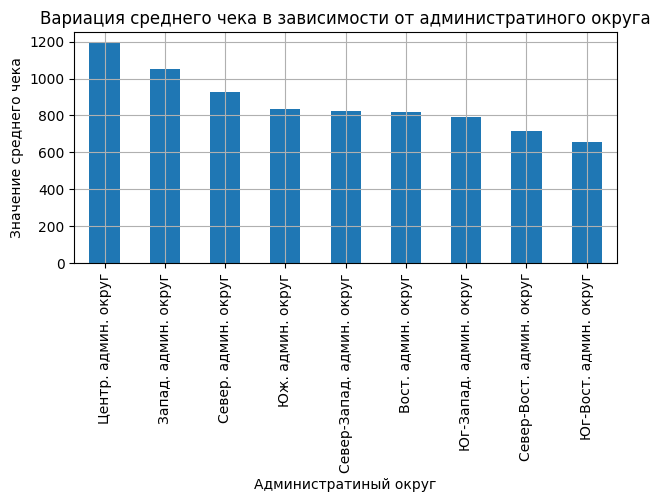

In [46]:
# Построим столбчатую диаграмму для того, чтобы рассмотреть вариацию среднего чека по округам Москвы
grouped.plot(
    kind='bar',
    figsize=(7,3),
    rot=90)
plt.xlabel('Администратиный округ')
plt.ylabel('Значение среднего чека')
plt.title('Вариация среднего чека в зависимости от администратиного округа')
plt.grid()
plt.show()

На графике можно заметить, что самый высокий средний чек можно встетить в Центральном округе Москвы. По мере удаления от центра средний чек уменьшается

###  Промежуточный вывод

Исследовательский анализ данных позволил сделать следующие выводы: 
* На рынке общественного питания преобладают кафе и рестораны их доля составляет больше половины от всего количества заведений
* Самое большое количество заведений находится в Центральном административном округе Москвы (2242), из них больше всего ресторанов (670). Так же этот округ отличается самыми высокими ценами, так средний чек заведения составляет 1191.06 рублей
* Больше всего в Москве несетвых заведений. Сетевыми же чаще всего являются булочные, кофейни и пиццерии
* В столбце `seats` были обнаружены аномальные значения, однако это могут быть не ошибки, а особенности данных, например за большим значением количества посадочных мест могу скрываться банкетные залы
* Изучение усредненных рейтингов для разных типов общепита показало, что тип заведения не слишком влиет на рейтинг, ведь особенных колебаний рейтинга не было заметно
* При изучении корреляции было обнаружено, что есть умеренная связь между рейтингом и местоположением и ценой

## Итоговый рейтинг

### Общий обзор работы
Целью проекта было провести исследовательский анализ данных рынка общественного питания Москвы для фонда Shut Up and Take My Money \
Для этого было проведено первичное знакомство с данными: определен объем, в каких столбцах встречаются пропуски, опеределены типы данных столбцов, а также были выделены особенности данных \
Далее проведена предобработка данных: скорректированы типы данных, проведена обработка пропусков, были выявленых явные и неявные дубликаты, добавлен столбец `is_24_7` \
Главным шагом было проведение исследовательского анализа данных, о его результатах в следующем пункте 


### Ответы на исследовательские вопросы, или главные выводы 
- Кафе и рестораны доминируют на рынке, составляя более половины заведений.  
- В ЦАО Москвы больше всего заведений (2242), включая 670 ресторанов. В этом районе самый высокий средний чек – 1191.06 руб.  
- В Москве преобладают несетевые заведения, а сетевыми чаще бывают булочные, кофейни и пиццерии.   
- Тип заведения мало влияет на рейтинг – значительных колебаний не выявлено.  
- Обнаружена умеренная корреляция рейтинга с местоположением и ценой.

### Рекомендации на основе анализа данных
Инвесторам из фонда Shut Up and Take My Money стоит обратить внимание на:
* Тип заведения на рейтинг, а значит популярность заведения не влияет, однако важно помнить, что открывая ресторан или кафе скорее всего владельцы столкнуться с высокой конкуренцией, также не стоит открывать кофейню, булочную или пиццерию из-за того, что большинство таких заведений является сетевыми, что также осложняет конкуренцию, таким образом лучше открыть бар, ресторан быстрого питания или столовую
* Местонахождение влияет на рейтинг, поэтому стоит обратить на этот фактор влияние. Так в Центральном районе большая проходимость, но и конкуренция, и средний чек выше. Стоит обратить внимание на САО, количество заведений в нем намного ниже, чем ЦАО, но средний чек занимает 3 место.
* Так как категория цены и рейтинг показывают слабую положительную зависимость имеет смысл рассмотреть цены 'средние' и 'выше среднего'